In [1]:
#observations
#1.  average fare higher in the rural areas.  probably because they are travelling longer distances or less drivers so less supply
#2.  urban has way more drivers but less average fares.  prob opposite reasons for rural
#3.  even tho urban has lower average fares, they are crushing in total revenue

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.widgets import TextBox

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)

#ride_data_df.head()
#city_data_df.head()
#total_rows = ride_data_df.count
#print (total_rows)

#Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, on='city', how='outer')

#total_rows = ride_data_df.count
#print (total_rows)
# Display the data table for preview

combined_df.head()
#check data types
#combined_df.dtypes
#make sure that s michelleport had the proper number or drivers and merge worked
#print(combined_df.loc[combined_df['city'] == 'South Michelleport'])
#check to make sure any null values
#combined_df[combined_df.isnull().any(1)]
#combined_df = combined_df.set_index('type')
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
#creating 3 dataframes based on type of city
urban_df = combined_df.loc[(combined_df)['type'] == 'Urban']
urban_df.head()

urban_mean = urban_df.groupby(['type', 'city'])['fare'].mean()
urban_mean

urban_count = urban_df.groupby(['type', 'city'])['fare'].count()
urban_count

urban_driver = urban_df['driver_count']
urban_driver.head()

0    5
1    5
2    5
3    5
4    5
Name: driver_count, dtype: int64

In [4]:
suburban_df = combined_df.loc[(combined_df)['type'] == 'Suburban']
suburban_df.head()

suburban_mean = suburban_df.groupby(['type', 'city'])['fare'].mean()
suburban_mean

suburban_count = suburban_df.groupby(['type', 'city'])['fare'].count()
suburban_count

suburban_driver = suburban_df['driver_count']
suburban_driver.head()

1625    11
1626    11
1627    11
1628    11
1629    11
Name: driver_count, dtype: int64

In [5]:
rural_df = combined_df.loc[(combined_df)['type'] == 'Rural']
rural_df.head()

rural_mean = rural_df.groupby(['type', 'city'])['fare'].mean()
rural_mean

rural_count = rural_df.groupby(['type', 'city'])['fare'].count()
rural_count

rural_driver = rural_df['driver_count']
rural_driver.head()

2250    9
2251    9
2252    9
2253    9
2254    9
Name: driver_count, dtype: int64

## Bubble Plot of Ride Sharing Data

In [6]:
## need to add the note

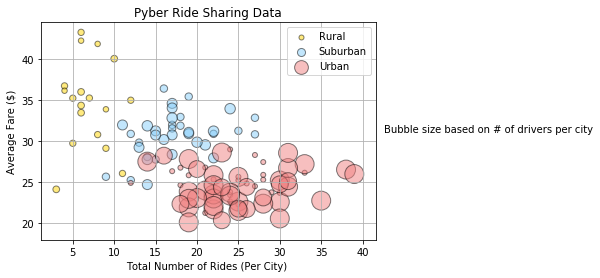

In [7]:

city_type = ['Rural', 'Suburban', 'Urban']
plt.xlabel('Total Number of Rides (Per City) ')
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data", loc="center")
#
#gold
x = rural_count
y = rural_mean
z = rural_driver
plt.scatter(x, y, s = z*5, c = 'gold', alpha = .5, edgecolors = 'black', linewidth = 1, )
plt.grid(True)
#light sky blue
x = suburban_count
y = suburban_mean
z = suburban_driver
plt.scatter(x,y, s = z*5, c = 'lightskyblue', alpha = .5, edgecolors = 'black', linewidth = 1)
#light coral
x = urban_count
y = urban_mean
z = urban_driver
plt.scatter(x,y, s = z*5, c = 'lightcoral', alpha = .5, edgecolors = 'black', linewidth = 1 )

plt.gcf().text(.92, .5, "Bubble size based on # of drivers per city", fontsize = 10)
#text_box = TextBox('Circle Sizes Corellate to Drivers Per City')
#text_box.on_submit(submit)
plt.legend(city_type, loc = 'best')
plt.savefig("../Images/PyberHomework.png")
plt.show()





## Total Rides by City Type

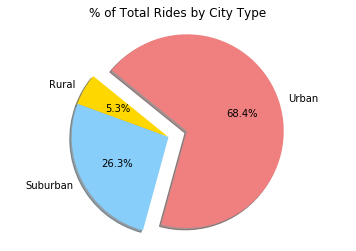

In [8]:


total_rides = len(combined_df.index)
total_rides

urban_rides = combined_df.loc[combined_df['type'] == 'Urban']
urban_rides = len(urban_rides.index)
urban_rides

rural_rides = combined_df.loc[combined_df['type'] == 'Rural']
rural_rides = len(rural_rides.index)
rural_rides

suburban_rides = combined_df.loc[combined_df['type'] == 'Suburban']
suburban_rides = len(suburban_rides.index)
suburban_rides


plt.title('% of Total Rides by City Type')
rides = [rural_rides, suburban_rides, urban_rides]
city_size = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.0,0.0,0.2)

plt.pie(rides, explode = explode, labels = city_size, colors = colors, autopct = '%1.1f%%',shadow = True, startangle = 141)

plt.axis('equal')
plt.savefig('../Images/PiePercentTtlRides.png')
plt.show()



## Total Fares by City Type

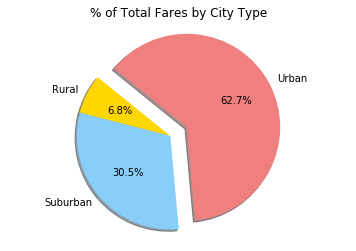

In [9]:


total_fares = combined_df['fare'].sum()
total_fares

urban_fares = urban_df['fare'].sum()
urban_fares


rural_fares = rural_df['fare'].sum()
rural_fares

suburban_fares = suburban_df['fare'].sum()
suburban_fares


plt.title('% of Total Fares by City Type')
fares = [rural_fares, suburban_fares, urban_fares]
city_size = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.0,0.0,0.2)

plt.pie(fares, explode = explode, labels = city_size, colors = colors, autopct = '%1.1f%%',shadow = True, startangle = 141)

plt.axis('equal')
plt.savefig('../Images/PiePercentTtlFares.png')
plt.show()



In [24]:
#this is wrong tho

combined_df = combined_df.drop_duplicates(subset = 'city')
combined_df.head()
driver_total = combined_df.groupby('type')['driver_count'].sum()

driver_total

urban_df = combined_df.loc[(combined_df)['type'] == 'Urban']
urban_df.head()
suburban_df = combined_df.loc[(combined_df)['type'] == 'Suburban']
suburban_df.head()
rural_df = combined_df.loc[(combined_df)['type'] == 'Rural']
rural_df.head()


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2255,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2264,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2276,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2287,Taylorhaven,2018-04-06 01:01:29,45.31,2275364435623,1,Rural


## Total Drivers by City Type

In [23]:
total_drivers = combined_df['driver_count'].sum()
total_drivers


2973

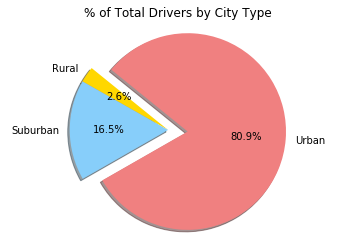

In [25]:
#Calculate Driver Percents
total_drivers = combined_df['driver_count'].sum()
total_drivers

urban_drivers = urban_df['driver_count'].sum()
urban_drivers

suburban_drivers = suburban_df['driver_count'].sum()
suburban_drivers


rural_drivers = rural_df['driver_count'].sum()
rural_drivers

# Build Pie Charts
plt.title('% of Total Drivers by City Type')
drivers = [rural_drivers, suburban_drivers, urban_drivers]
city_size = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.0,0.0,0.2)

plt.pie(drivers, explode = explode, labels = city_size, colors = colors, autopct = '%1.1f%%',shadow = True, startangle = 141)

plt.axis('equal')
plt.savefig('../Images/PiePercentTtlDrivers.png')
plt.show()

